In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load data

In [31]:
player_data = pd.read_pickle('player_stats.pkl')
player_data.head()

,Player,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,TOV,PF,PTS,ORtg,DRtg,Team,Season,Class,Pos,Height
0,Julian Edmonson,30,5.0,568,10.5,26.2,0.401,6.2,15.2,0.411,...,5.6,6.6,34.5,102.3,107.9,abilene-christian,2014,3.0,G,73.0
1,Jacob Lancaster,31,11.0,434,12.0,21.7,0.553,11.8,21.5,0.551,...,5.6,6.7,29.1,102.9,99.3,abilene-christian,2014,3.0,F,82.0
2,Parker Wentz,31,29.0,1040,7.7,15.7,0.491,3.2,5.6,0.576,...,3.4,4.0,24.5,124.7,107.5,abilene-christian,2014,2.0,G,69.0
3,LaDarrien Williams,16,14.0,474,8.1,21.8,0.371,6.4,16.3,0.389,...,4.2,5.2,24.4,101.2,104.1,abilene-christian,2014,3.0,G,72.0
4,Harrison Hawkins,16,16.0,481,6.8,18.1,0.374,3.7,10.4,0.353,...,6.0,5.8,24.1,100.9,108.5,abilene-christian,2014,3.0,G,72.0


## analyze data by position


In [21]:
positions = player_data.Pos.dropna().unique()
print(positions)

['G' 'F' 'C']


### calculate mean points per year, by position

In [22]:
mean_posn_pts = {}
for pos in positions:
    temp = player_data[player_data.Pos == pos].copy()
    mean_annual_pts = temp.groupby('Season')['PTS'].mean()
    mean_posn_pts[pos] = mean_annual_pts

In [24]:
mean_posn_pts['C']

Season
2014    16.363557
2015    16.700318
2016    17.430822
2017    17.517407
2018    17.419141
Name: PTS, dtype: float64

### plot mean points by position

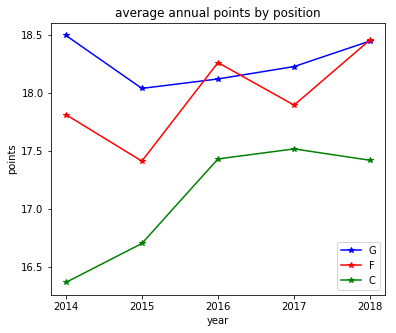

In [30]:
colors = ['b','r','g'] # color each position differently

# instatiate a figure object
fig, ax = plt.subplots(figsize=(6,5))

# plot a line for each postion, with its own color
for pos, c in zip(positions, colors):
    # define x, y vectors and plot
    years = mean_posn_pts[pos].index
    vals = mean_posn_pts[pos].values
    ax.plot(years, vals, '-*', color=c, label='{}'.format(pos)) # label gets passed to legend object
    
# common plot attributes (title, legend, axis labels, etc)
plt.legend(loc='lower right')
plt.title('average annual points by position')
plt.ylabel('points')
plt.xlabel('year')
plt.xticks(np.linspace(2014,2018,5)) # it was plotting at 1/2 year scale so I'm explicitly providing xticks
plt.show()